In [6]:
import jieba
import pkuseg
import jieba.analyse as ana

In [7]:
seg = pkuseg.pkuseg()

In [8]:
with open("note.txt","r") as f:
    origin_data = f.readlines()

In [9]:
result_data = []
ana.set_stop_words('./cn_stopwords.txt')

for t in origin_data:
    if t == '\n':
        continue
    temp = ana.extract_tags(t)
    result_data += temp

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0y/9vky8g3930z8n0vhjtf87rq80000gn/T/jieba.cache
Loading model cost 0.297 seconds.
Prefix dict has been built successfully.


In [10]:
result_data[0:100]

['冰蚕',
 '神界',
 '天梦',
 '唐三',
 '第一集',
 '引子',
 '一家',
 '先发',
 '引子',
 '上来',
 '唐门门主',
 '唐门',
 '绝世',
 '孤军奋战',
 '信息量',
 '巅峰',
 '榜单',
 '上榜',
 '一章',
 '登上',
 '眼看',
 '忍不住',
 '看看',
 '很大',
 '能够',
 '不能',
 '别忘记',
 '新书',
 '急需',
 '投票',
 '收藏',
 '谢谢',
 '推荐',
 '支持',
 '之后',
 '光晕',
 '虚幻',
 '柔和',
 '有着',
 '抚触',
 '触摸',
 '宛如',
 '巍峨',
 '隐约',
 '云雾',
 '不远处',
 '动人',
 '肌肤',
 '细腻',
 '宫殿',
 '实质',
 '轻轻',
 '真实',
 '一座',
 '异常',
 '伫立',
 '静静的',
 '无尽',
 '眺望',
 '远方',
 '云雾',
 '身影',
 '一道',
 '看着',
 '之间',
 '知道',
 '伟岸',
 '身形',
 '宛如',
 '长发',
 '宽阔',
 '瀑布',
 '蓝色',
 '脚下',
 '肩膀',
 '一头',
 '女子',
 '仅仅',
 '恐怕',
 '有着',
 '后面',
 '一直',
 '蓝色',
 '水波荡漾',
 '被吸入',
 '蔚蓝',
 '华贵',
 '无尽',
 '长袍',
 '深邃',
 '瞬间',
 '大海',
 '眼神',
 '深深',
 '灵魂',
 '仔细',
 '仿佛',
 '吸引',
 '之中',
 '整个']

In [11]:
import pandas as pd
df = pd.DataFrame(result_data, columns=['word'])
df.head(20)

,word
0,冰蚕
1,神界
2,天梦
3,唐三
4,第一集
5,引子
6,一家
7,先发
8,引子
9,上来


In [12]:
group_by_res = df.groupby(['word'])

In [13]:
freqlist = group_by_res.size().sort_values(ascending=False)

In [19]:
freq_dict = freqlist.to_dict()
freq_dict

{'霍雨浩': 518,
 '贝贝': 185,
 '唐雅': 136,
 '王冬': 106,
 '周漪': 103,
 '冰蚕': 100,
 '天梦': 93,
 '武魂': 89,
 '老师': 85,
 '学员': 85,
 '魂环': 84,
 '史莱克': 83,
 '学院': 83,
 '魂力': 80,
 '修炼': 79,
 '精神': 79,
 '已经': 77,
 '唐门': 71,
 '一个': 66,
 '魂兽': 60,
 '魂师': 56,
 '身体': 56,
 '小雅': 53,
 '能够': 48,
 '探测': 48,
 '大陆': 47,
 '星斗': 44,
 '斗罗': 44,
 '没有': 43,
 '森林': 42,
 '出现': 41,
 '第一集': 39,
 '魂导器': 39,
 '顿时': 39,
 '新生': 39,
 '师兄': 39,
 '第一': 38,
 '技能': 37,
 '魂技': 37,
 '灵眸': 36,
 '看着': 36,
 '强大': 36,
 '知道': 35,
 '修为': 35,
 '瞬间': 34,
 '身上': 34,
 '竟然': 33,
 '推荐': 32,
 '之中': 32,
 '一边': 32,
 '狒狒': 32,
 '收藏': 32,
 '起来': 31,
 '一下': 30,
 '点头': 30,
 '心中': 30,
 '属性': 30,
 '少年': 29,
 '一名': 29,
 '共享': 29,
 '白色': 29,
 '一声': 29,
 '先前': 28,
 '玄天功': 28,
 '宿舍': 28,
 '帆羽': 28,
 '似乎': 27,
 '公爵': 27,
 '曼陀罗': 27,
 '看到': 27,
 '感觉': 26,
 '时间': 26,
 '百万年': 25,
 '天赋': 25,
 '之后': 24,
 '感受': 24,
 '渐渐': 24,
 '速度': 23,
 '突然': 23,
 '一丝': 23,
 '刚才': 23,
 '努力': 23,
 '淡淡的': 22,
 '变得': 22,
 '有着': 22,
 '不禁': 22,
 '千年': 22,
 '考核': 22,
 '样子': 22,
 '一定': 

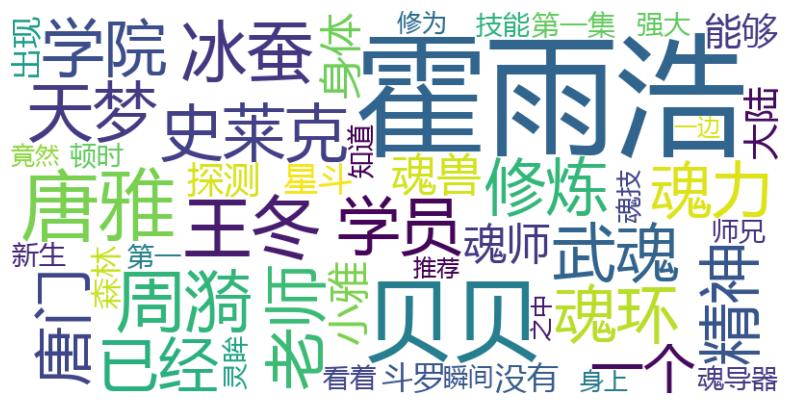

In [23]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=50, font_path="微软雅黑.ttf").generate_from_frequencies(freq_dict)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
